# Import Library

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# First look


In [309]:
df = pd.read_csv('insurance_fraud.csv')
df.head(2)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound,ClaimedAmount
0,Dec,5,Wednesday,Honda,Urban,Jan,1,Female,Single,21,...,No,No,External,none,1 year,3 to 4,1994,0,0,5386
1,Jan,3,Wednesday,Honda,Urban,Jan,4,Male,Single,34,...,Yes,No,External,none,no change,1 vehicle,1994,2,0,5811


In [310]:
#check missing Values
print(f"This dataframe contain missing values = {df.isnull().sum().sum()}")

#check duplicate values 

print(f"This dataframe contain missing values = {df.duplicated().sum()}")


This dataframe contain missing values = 0
This dataframe contain missing values = 0


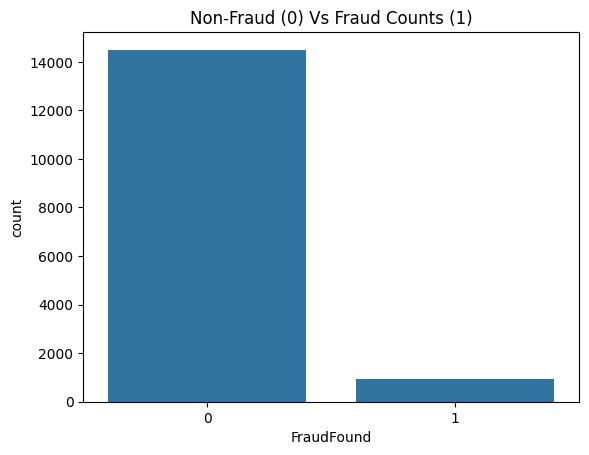

In [311]:
#check Volume of each classes
sns.countplot(x=df['FraudFound'])
plt.title("Non-Fraud (0) Vs Fraud Counts (1)")
plt.show()

In [312]:
number_fraud = len(df[df['FraudFound']==1])  # 2 stands for fraud and 0 for no fraud
number_fraud

#Check Minority class 
percent = (number_fraud / df.shape[0]) * 100
print(f"fraud detected are {percent:.2f} % of all data points")

fraud detected are 5.99 % of all data points


In [313]:
#check rows and Columns
print(f"This dataframe contain {df.shape[0]} rows")
print(f"This dataframe contain {df.shape[1]} columns")

This dataframe contain 15420 rows
This dataframe contain 32 columns


In [314]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age',
       'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'ClaimedAmount'],
      dtype='object')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   MonthClaimed          15420 non-null  object
 6   WeekOfMonthClaimed    15420 non-null  int64 
 7   Sex                   15420 non-null  object
 8   MaritalStatus         15420 non-null  object
 9   Age                   15420 non-null  int64 
 10  Fault                 15420 non-null  object
 11  PolicyType            15420 non-null  object
 12  VehicleCategory       15420 non-null  int64 
 13  VehiclePrice          15420 non-null  int64 
 14  PolicyNumber          15420 non-null  int64 
 15  RepNumber             15420 non-null

### Basic EDA

<Axes: xlabel='Month', ylabel='count'>

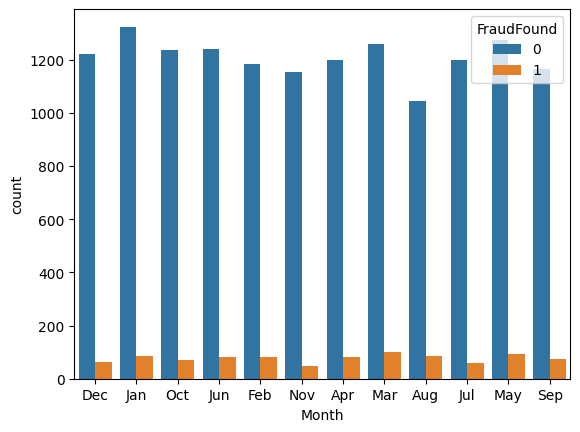

In [316]:
sns.countplot(data=df, x='Month', hue='FraudFound')

<Axes: xlabel='WeekOfMonth', ylabel='count'>

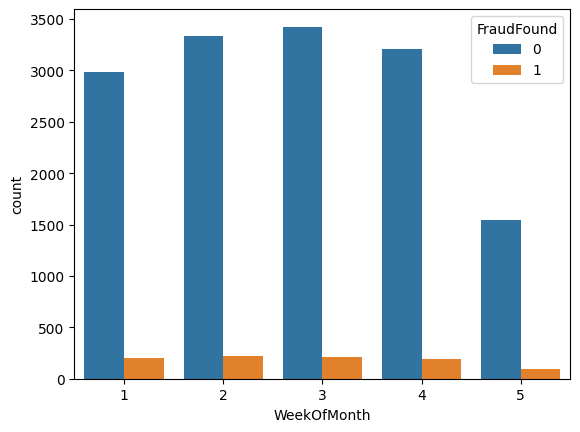

In [317]:
sns.countplot(data=df, x='WeekOfMonth', hue='FraudFound')

<Axes: xlabel='DayOfWeek', ylabel='count'>

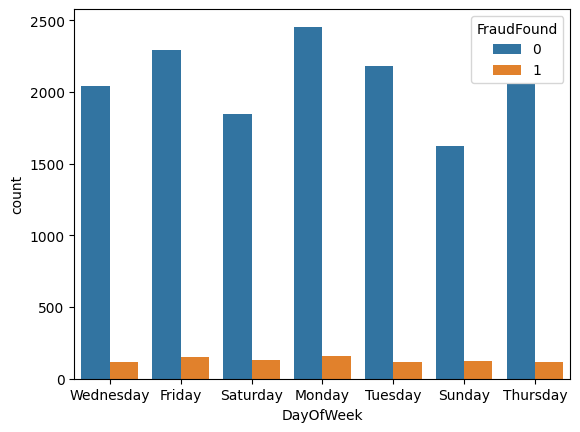

In [318]:
sns.countplot(data=df, x='DayOfWeek', hue='FraudFound')

<Axes: xlabel='count', ylabel='Make'>

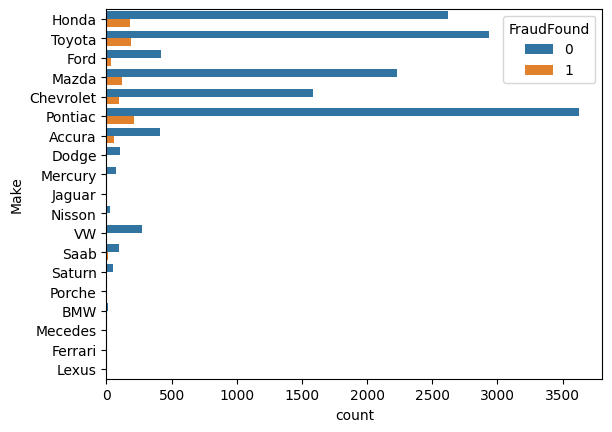

In [319]:
sns.countplot(data=df, y='Make', hue='FraudFound')

<Axes: xlabel='count', ylabel='AccidentArea'>

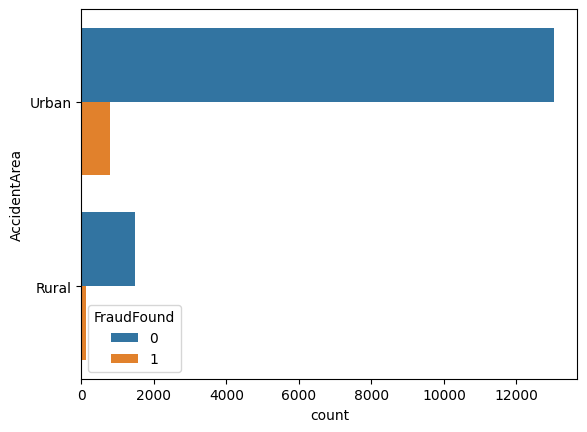

In [320]:
sns.countplot(data=df, y='AccidentArea', hue='FraudFound')

<Axes: xlabel='count', ylabel='MonthClaimed'>

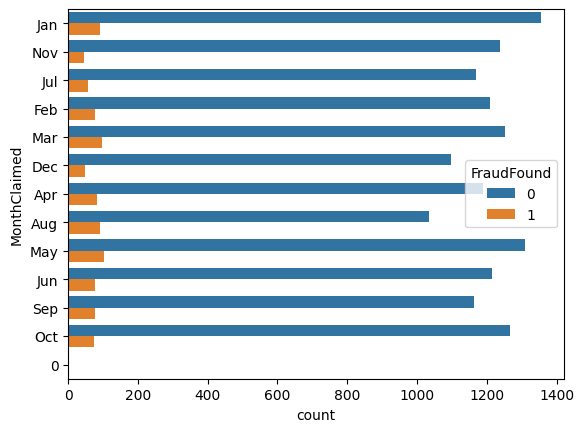

In [321]:
sns.countplot(data=df, y='MonthClaimed', hue='FraudFound')

<Axes: xlabel='count', ylabel='Sex'>

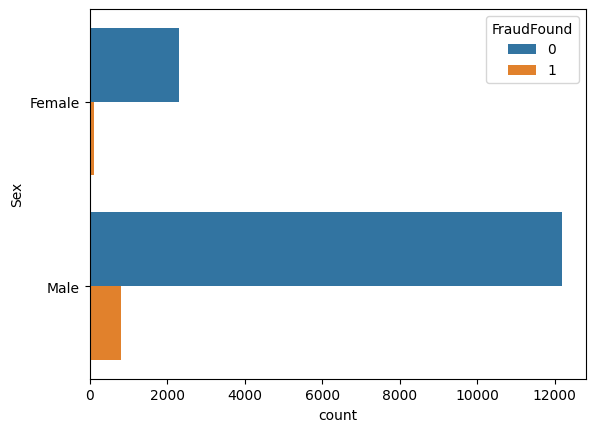

In [322]:
sns.countplot(data=df, y='Sex', hue='FraudFound')

<Axes: xlabel='count', ylabel='MaritalStatus'>

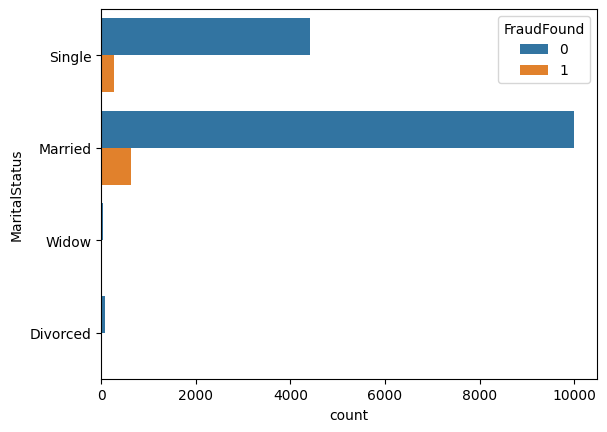

In [323]:
sns.countplot(data=df, y='MaritalStatus', hue='FraudFound')

<Axes: xlabel='count', ylabel='Fault'>

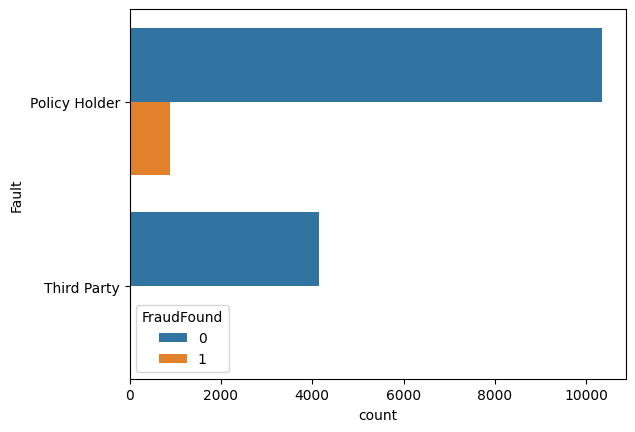

In [324]:
sns.countplot(data=df, y='Fault', hue='FraudFound')

<Axes: xlabel='count', ylabel='PolicyType'>

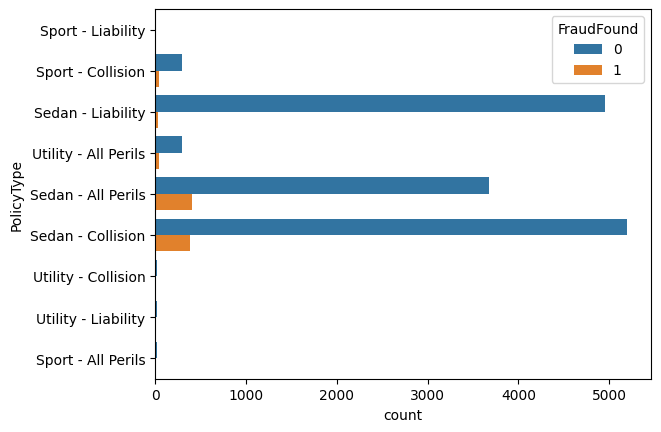

In [325]:
sns.countplot(data=df, y='PolicyType', hue='FraudFound')

<Axes: xlabel='count', ylabel='VehicleCategory'>

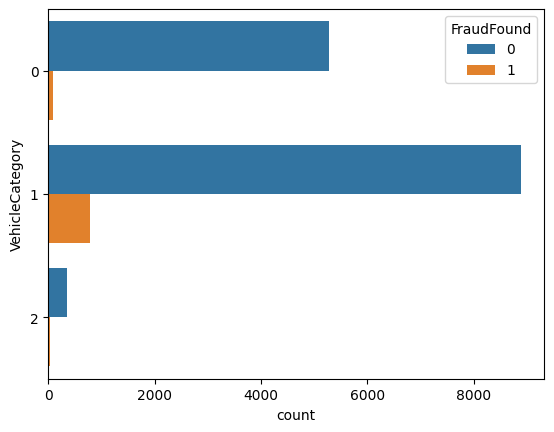

In [326]:
sns.countplot(data=df, y='VehicleCategory', hue='FraudFound')

<Axes: xlabel='count', ylabel='VehiclePrice'>

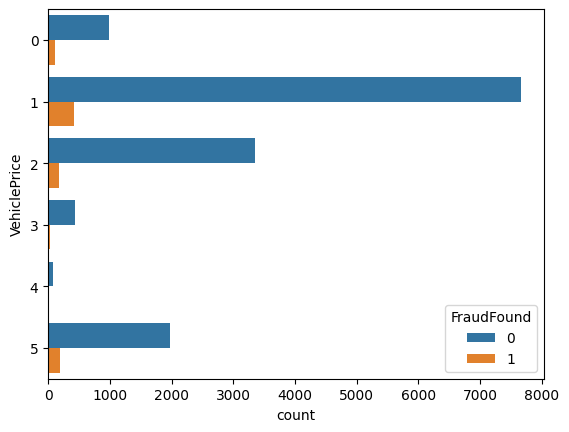

In [327]:
sns.countplot(data=df, y='VehiclePrice', hue='FraudFound')

<Axes: xlabel='count', ylabel='Deductible'>

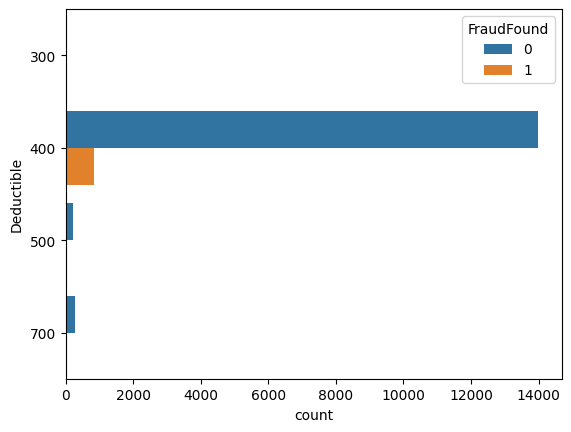

In [328]:
sns.countplot(data=df, y='Deductible', hue='FraudFound')

<Axes: xlabel='count', ylabel='DriverRating'>

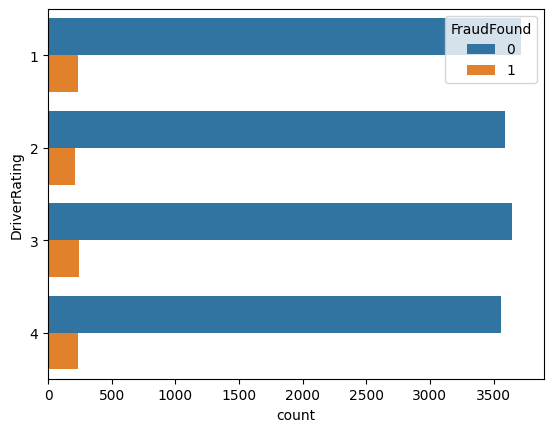

In [329]:
sns.countplot(data=df, y='DriverRating', hue='FraudFound')

<Axes: xlabel='count', ylabel='Days_Policy_Accident'>

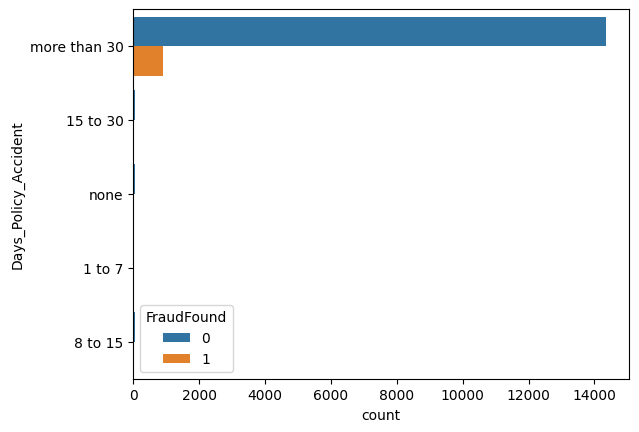

In [330]:
sns.countplot(data=df, y='Days_Policy_Accident', hue='FraudFound')

<Axes: xlabel='count', ylabel='Days_Policy_Claim'>

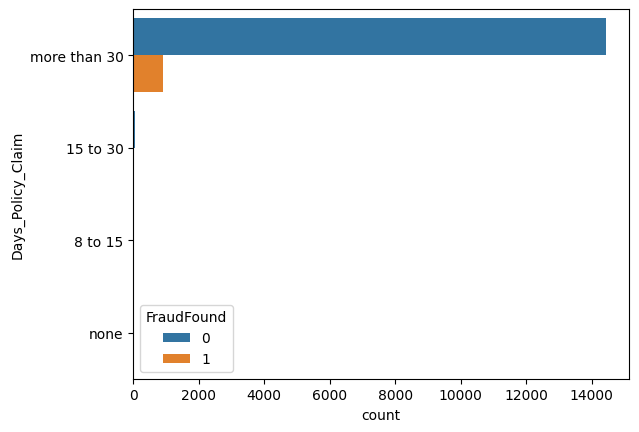

In [331]:
sns.countplot(data=df, y='Days_Policy_Claim', hue='FraudFound')

<Axes: xlabel='count', ylabel='PastNumberOfClaims'>

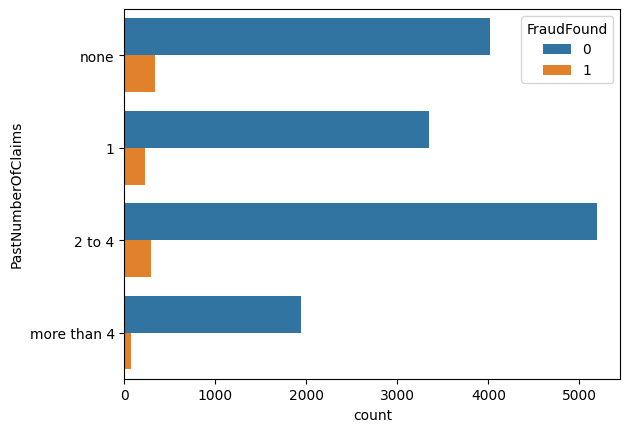

In [332]:
sns.countplot(data=df, y='PastNumberOfClaims', hue='FraudFound')

<Axes: xlabel='count', ylabel='AgeOfVehicle'>

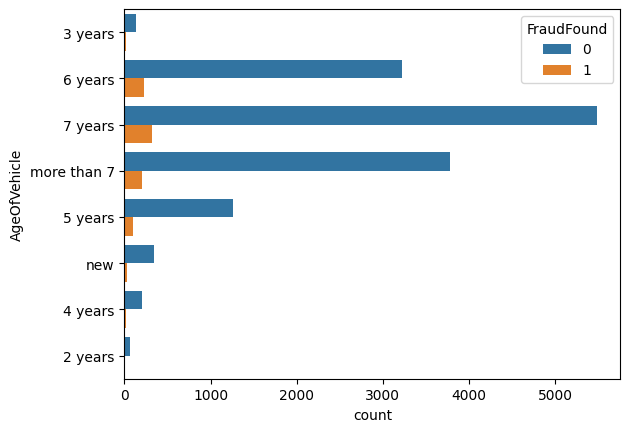

In [333]:
sns.countplot(data=df, y='AgeOfVehicle', hue='FraudFound')

<Axes: xlabel='count', ylabel='PoliceReportFiled'>

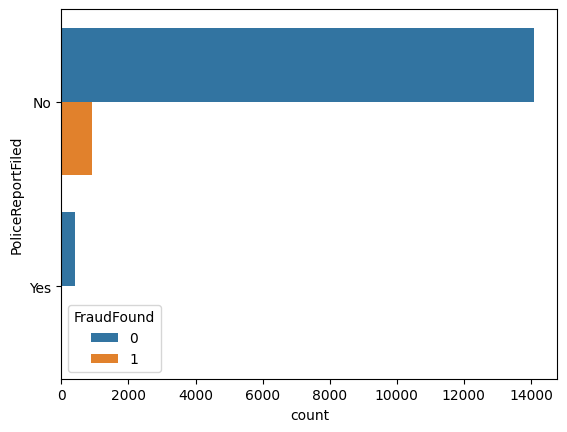

In [334]:
sns.countplot(data=df, y='PoliceReportFiled', hue='FraudFound')

<Axes: xlabel='count', ylabel='WitnessPresent'>

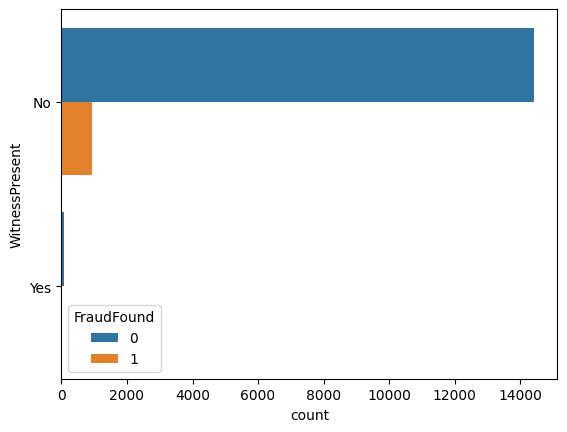

In [335]:
sns.countplot(data=df, y='WitnessPresent', hue='FraudFound')

<Axes: xlabel='count', ylabel='AgentType'>

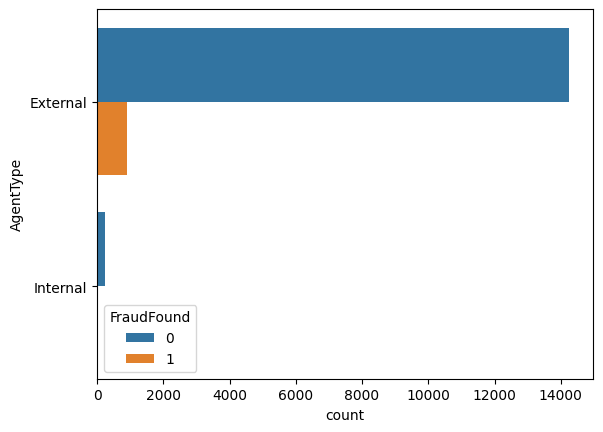

In [336]:
sns.countplot(data=df, y='AgentType', hue='FraudFound')

<Axes: xlabel='count', ylabel='NumberOfSuppliments'>

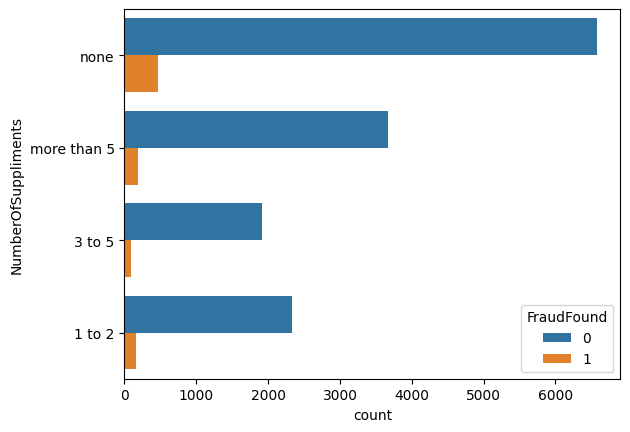

In [337]:
sns.countplot(data=df, y='NumberOfSuppliments', hue='FraudFound')

<Axes: xlabel='count', ylabel='AddressChange_Claim'>

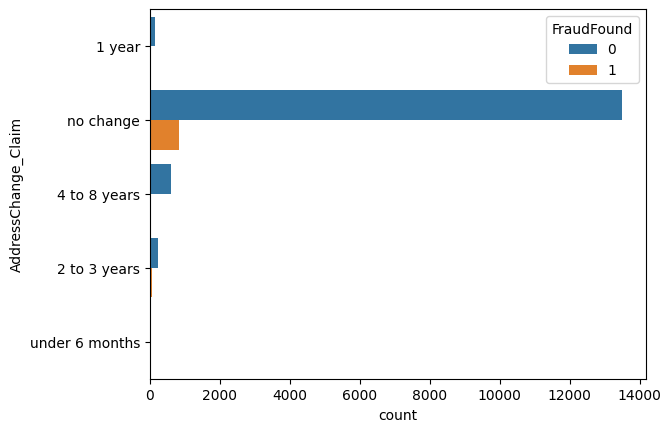

In [338]:
sns.countplot(data=df, y='AddressChange_Claim', hue='FraudFound')

<Axes: xlabel='count', ylabel='NumberOfCars'>

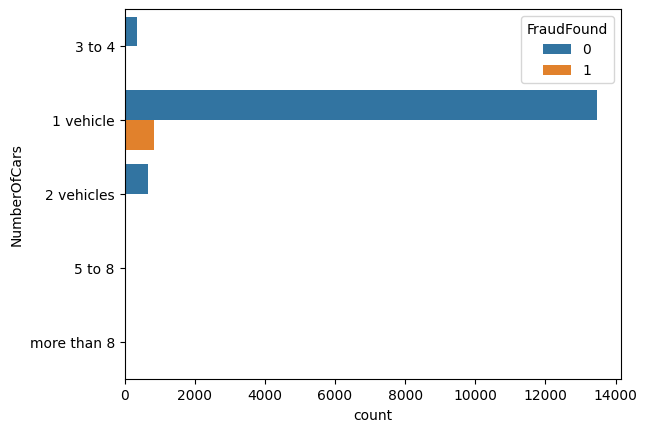

In [339]:
sns.countplot(data=df, y='NumberOfCars', hue='FraudFound')

<Axes: xlabel='count', ylabel='Year'>

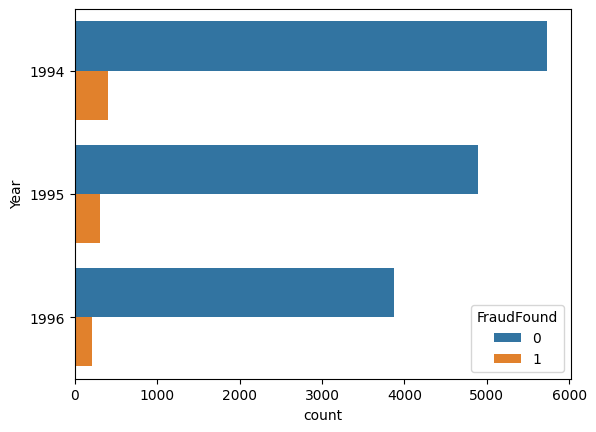

In [340]:
sns.countplot(data=df, y='Year', hue='FraudFound')

<Axes: xlabel='count', ylabel='BasePolicy'>

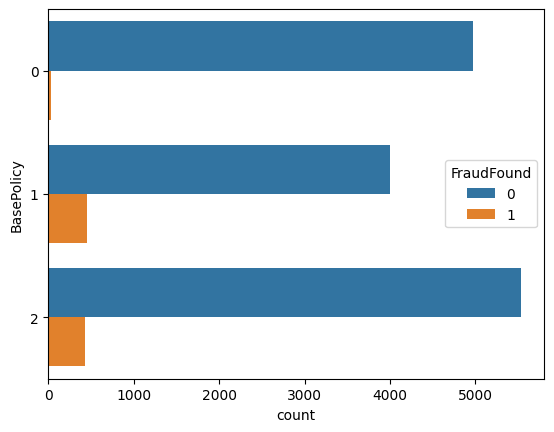

In [341]:
sns.countplot(data=df, y='BasePolicy', hue='FraudFound')

# Preprocessing


In [342]:
#Contained the same values again
df[['BasePolicy', 'PolicyType']].head()

,BasePolicy,PolicyType
0,0,Sport - Liability
1,2,Sport - Collision
2,2,Sport - Collision
3,0,Sedan - Liability
4,2,Sport - Collision


In [343]:
#drop unwanted columns

unwanted_columns = [
    'PolicyNumber', 
    'BasePolicy', 
    'VehicleCategory',
    "AddressChange_Claim",
    "RepNumber",
    "NumberOfSuppliments",
    "WeekOfMonthClaimed",
    "Deductible",
    "NumberOfCars",
    "WeekOfMonth",
    "AgeOfVehicle",
    "AgentType"
]
# Assuming df is your DataFrame
df.drop(columns=unwanted_columns, inplace=True)

### One Hot Encoding

### Change Categorical to number

In [344]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Create dictionaries
Month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
DayOfWeek = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
Make = {'Honda':1, 'Toyota':2, 'Ford':3, 'Mazda':4, 'Chevrolet':5, 'Pontiac':6,
       'Accura':7, 'Dodge':8, 'Mercury':9, 'Jaguar':10, 'Nisson':11, 'VW':12, 'Saab':13,
       'Saturn':14, 'Porche':15, 'BMW':16, 'Mecedes':17, 'Ferrari':18, 'Lexus':19}
AccidentArea = {'Urban' : 0, "Rural": 1}
Sex = {'Female' : 0, "Male": 1}
MaritalStatus = {'Single':1,'Married':2,'Widow':3, 'Divorced':4}
Fault = {'Policy Holder':0, "Third Party":1}
PolicyType = {'Sport - Liability':0, 'Sport - Collision':1, 'Sedan - Liability':2,
       'Utility - All Perils':3, 'Sedan - All Perils':4, 'Sedan - Collision':5,
       'Utility - Collision':6, 'Utility - Liability':7, 'Sport - All Perils':8}
VehiclePrice = {'more than 69,000':0, '20,000 to 29,000':1, '30,000 to 39,000':2,
       'less than 20,000':3, '40,000 to 59,000':4, '60,000 to 69,000':5}
Days_Policy_Accident = {'more than 30':2, '15 to 30':1, 'none':0, '1 to 7':3, '8 to 15':4}
Days_Policy_Claim = {'more than 30':2, '15 to 30':1, '8 to 15':3, 'none':0}
PastNumberOfClaims = {'none':0, '1':1, '2 to 4':2, 'more than 4':3}
AgeOfVehicle = {'3 years':3, '6 years':6, '7 years':7, 'more than 7':10, '5 years':5, 'new':0,
       '4 years':3, '2 years':1}
PoliceReportFiled = {'No':0, "Yes":1}
WitnessPresent = {'No':0, "Yes":1}
AgentType = {'External':0, 'Internal':1}
NumberOfSuppliments = {'none':0, 'more than 5':3, '3 to 5':2, '1 to 2':1}
AddressChange_Claim = {'1 year':2, 'no change':0, '4 to 8 years':4, '2 to 3 years':3,
       'under 6 months':1}
NumberOfCars = {'3 to 4':2, '1 vehicle' :0, '2 vehicles':1, '5 to 8':3, 'more than 8':4}
BasePolicy = {"Liability":0, "Collision" : 1, "All Perils" : 2}
VehicleCategory = {"Sedan" : 0, "Sports" : 1, "utility":2}



# Replace categorical values with numerical values
df.replace({'Month': Month,
            'DayOfWeek': DayOfWeek,
            'Make': Make,
            'AccidentArea': AccidentArea,
            'Sex': Sex,
            'MaritalStatus': MaritalStatus,
            'Fault': Fault,
            'PolicyType': PolicyType,
            'VehiclePrice': VehiclePrice,
            'Days_Policy_Accident': Days_Policy_Accident,
            'Days_Policy_Claim': Days_Policy_Claim,
            'PastNumberOfClaims': PastNumberOfClaims,
            'AgeOfVehicle': AgeOfVehicle,
            'PoliceReportFiled': PoliceReportFiled,
            'WitnessPresent': WitnessPresent,
            'AgentType': AgentType,
            'NumberOfSuppliments': NumberOfSuppliments,
            'AddressChange_Claim': AddressChange_Claim,
            'NumberOfCars': NumberOfCars,
            'DayOfWeekClaimed' : DayOfWeek,
            'MonthClaimed':Month,  
            'basePolicy' : BasePolicy
            }, inplace=True)


C:\Users\arnav\AppData\Local\Temp\ipykernel_23112\2623939516.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Month': Month,


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  int64 
 1   DayOfWeek             15420 non-null  int64 
 2   Make                  15420 non-null  int64 
 3   AccidentArea          15420 non-null  int64 
 4   MonthClaimed          15420 non-null  object
 5   Sex                   15420 non-null  int64 
 6   MaritalStatus         15420 non-null  int64 
 7   Age                   15420 non-null  int64 
 8   Fault                 15420 non-null  int64 
 9   PolicyType            15420 non-null  int64 
 10  VehiclePrice          15420 non-null  int64 
 11  DriverRating          15420 non-null  int64 
 12  Days_Policy_Accident  15420 non-null  int64 
 13  Days_Policy_Claim     15420 non-null  int64 
 14  PastNumberOfClaims    15420 non-null  int64 
 15  PoliceReportFiled     15420 non-null

# Modelling
1.   RandomForest


### RF to predict whether the claimant has  afradualant claim or not

#### remove all the unnesessary attributes which wont benifit the accuracy

In [346]:
df.head()

,Month,DayOfWeek,Make,AccidentArea,MonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,PoliceReportFiled,WitnessPresent,Year,FraudFound,ClaimedAmount
0,12,4,1,0,1,0,1,21,0,0,5,1,2,2,0,0,0,1994,0,5386
1,1,4,1,0,1,1,1,34,0,1,5,4,2,2,0,1,0,1994,0,5811
2,10,6,1,0,11,1,2,47,0,1,5,3,2,2,1,0,0,1994,0,5545
3,6,7,2,1,7,1,2,65,1,2,1,2,2,2,1,1,0,1994,0,7120
4,1,2,1,0,2,0,1,27,1,1,5,1,2,2,0,0,0,1994,0,5965


In [347]:
y = df[['FraudFound']]
X = df.drop('FraudFound', axis=1)

In [348]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9393644617380026


### conf matrix

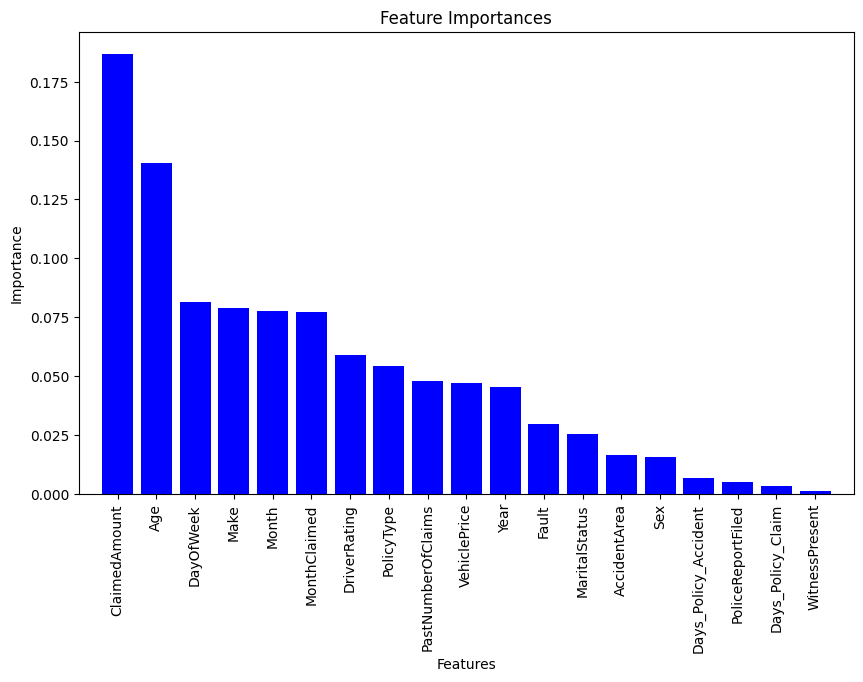

In [350]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


### Lets furthur reduce the features of less importance

In [351]:
columns_to_drop = ['WitnessPresent', 'Days_Policy_Claim', 'Days_Policy_Accident', 'Fault', 'Year', 'MaritalStatus', 'DayOfWeek', "Month","DriverRating", "ClaimedAmount"]

# Drop the columns
test_new_df = df.drop(columns=columns_to_drop)


In [352]:
y = test_new_df[['FraudFound']]
X = test_new_df.drop('FraudFound', axis=1)

In [353]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

In [358]:
X_train.head()

,Make,AccidentArea,MonthClaimed,Sex,Age,PolicyType,VehiclePrice,PastNumberOfClaims,PoliceReportFiled
8294,1,0,9,1,23,5,1,2,1
9591,6,0,7,1,34,2,1,3,0
14227,12,0,7,1,45,5,3,2,0
14863,6,0,12,1,40,2,1,2,0
6994,1,0,1,1,28,4,0,0,0


In [354]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  # No change in accuracy

c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9348249027237354


### Perform Cross Validation

In [355]:
from sklearn.model_selection import cross_val_score

# Assuming rf_model is your trained Random Forest model and X, y are your features and target variable
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConvers

Cross-validation scores: [0.93287938 0.93158236 0.92996109 0.93028534 0.93417639]
Mean cross-validation score: 0.9317769130998703


### Feature importance

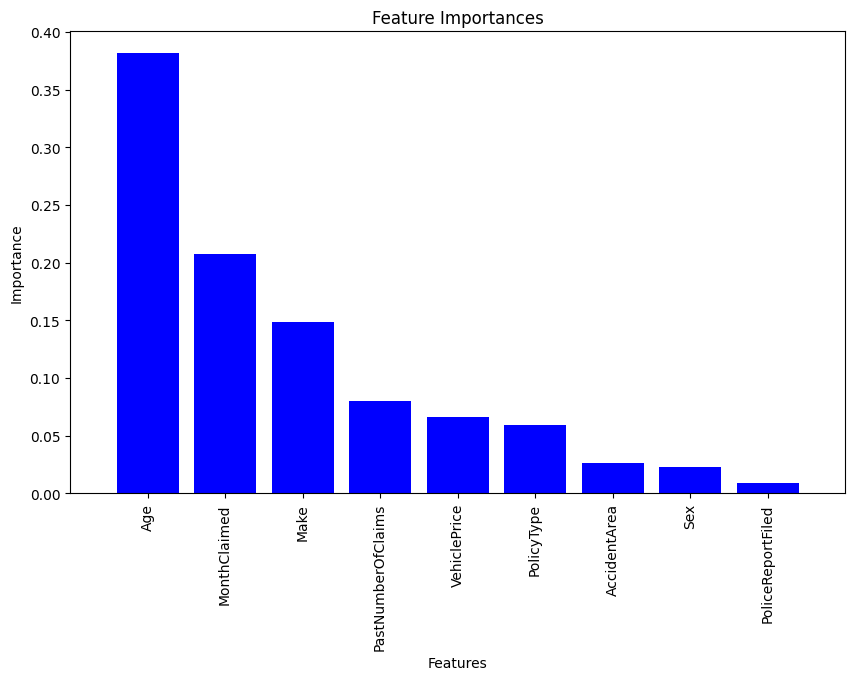

In [356]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [357]:
## save the model

# import pickle

# # save the model
# with open('rf_model.pkl', 'wb') as f:
#     pickle.dump(rf_binary_classifier, f)
